Investigate the properties of those SGA galaxies within the DESI footprint that have HI detections via ALFALFA.

In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def norm_hist(data, bins):
    '''
    Calculate the normalized histogram values, where the bin counts 
    are normalized by the total number of objects in the sample.
    '''
    
    counts,_ = np.histogram(data, bins=bins)
    
    return counts/len(data)

# Data

In [3]:
SGA_HI_filename = '/Users/kellydouglass/Documents/Research/data/SGA/SGA-parent-v3.0_ALFALFA.txt'

SGA_HI = Table.read(SGA_HI_filename, format='ascii.commented_header')

In [4]:
DESI_boolean = SGA_HI['IN_DESI'] == 'True'

SGA_HI_inDESI = SGA_HI[DESI_boolean]
SGA_HI_noDESI = SGA_HI[~DESI_boolean]

In [5]:
ALFALFA_boolean = SGA_HI_inDESI['ALFALFA_index'] > 0

SGA_inDESI_HI = SGA_HI_inDESI[ALFALFA_boolean]
SGA_inDESI_noHI = SGA_HI_inDESI[~ALFALFA_boolean]

# Position on the sky

Where do those galaxies with HI detections live?

<IPython.core.display.Javascript object>


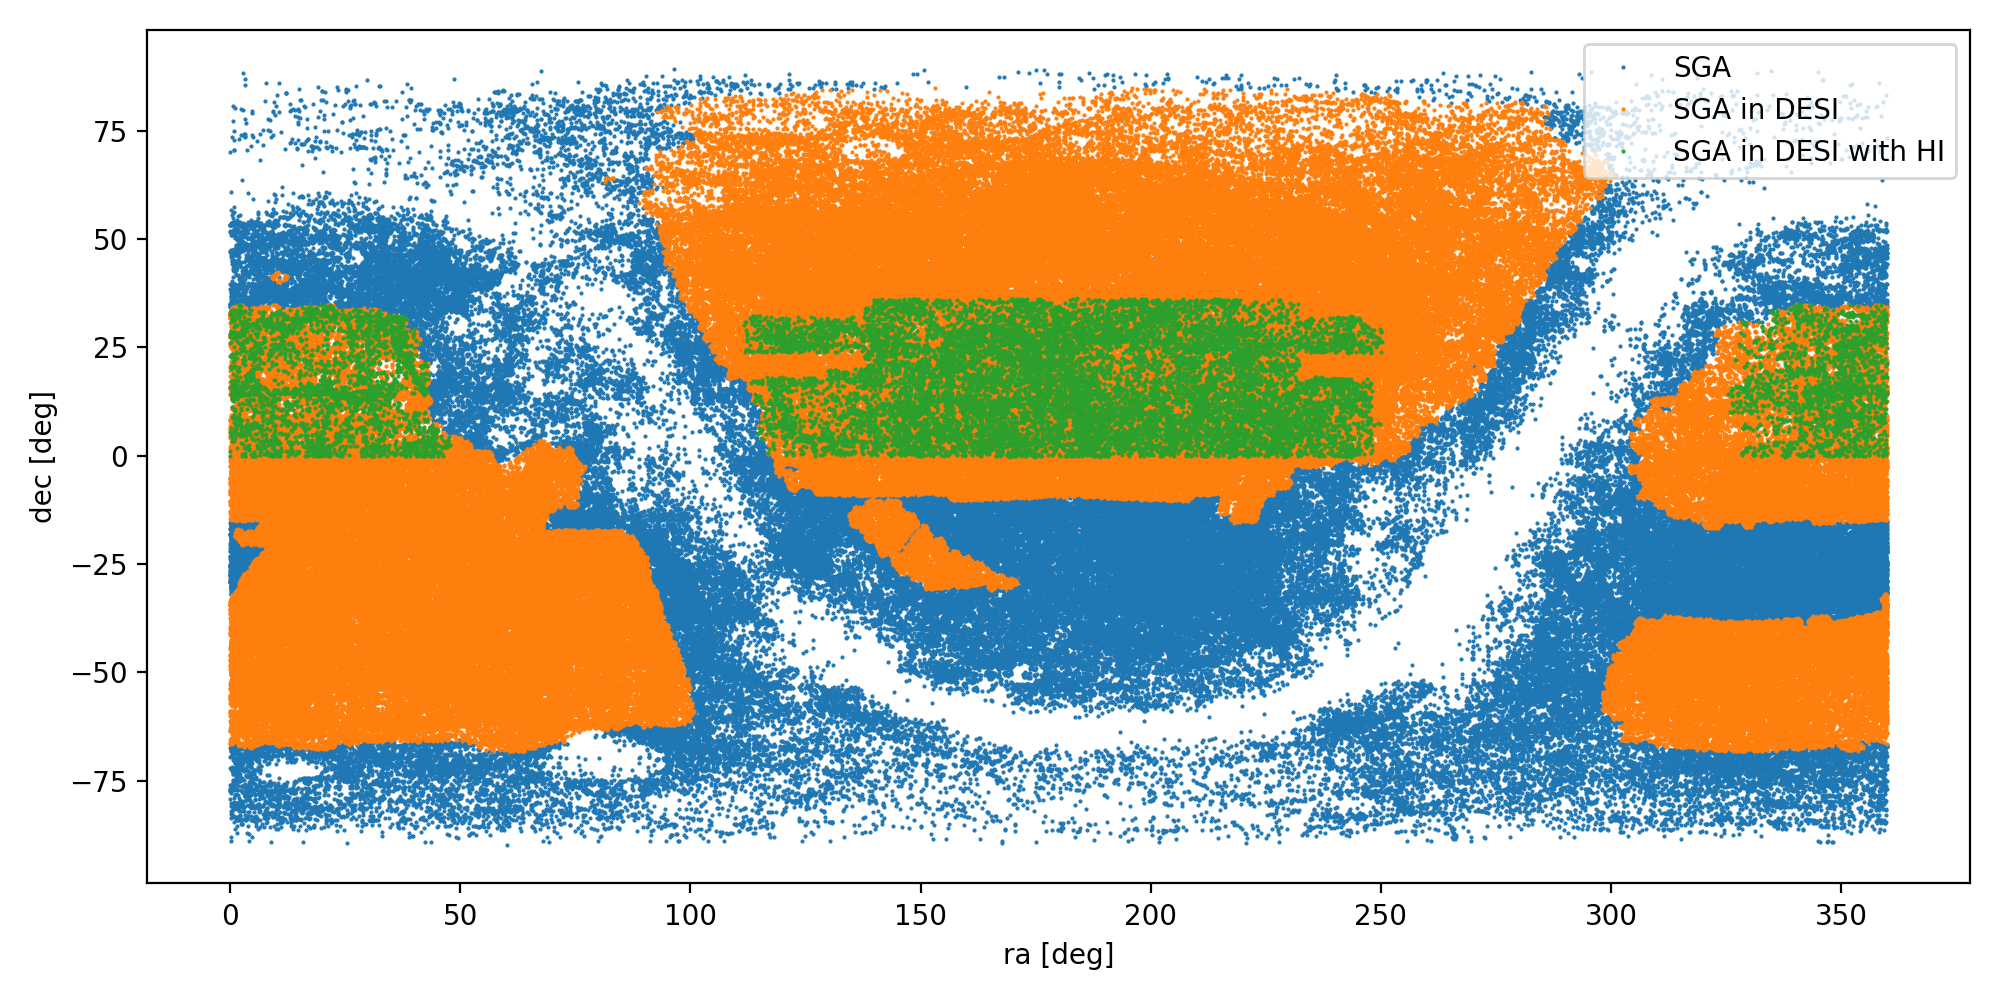

In [6]:
plt.figure(figsize=(10,5))

plt.plot(SGA_HI_noDESI['RA'], SGA_HI_noDESI['DEC'], '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_noHI['RA'], SGA_inDESI_noHI['DEC'], '.', markersize=1, label='SGA in DESI')
plt.plot(SGA_inDESI_HI['RA'], SGA_inDESI_HI['DEC'], '.', markersize=1, label='SGA in DESI with HI')

plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')

plt.legend()

plt.tight_layout();

# Redshift distribution

<IPython.core.display.Javascript object>


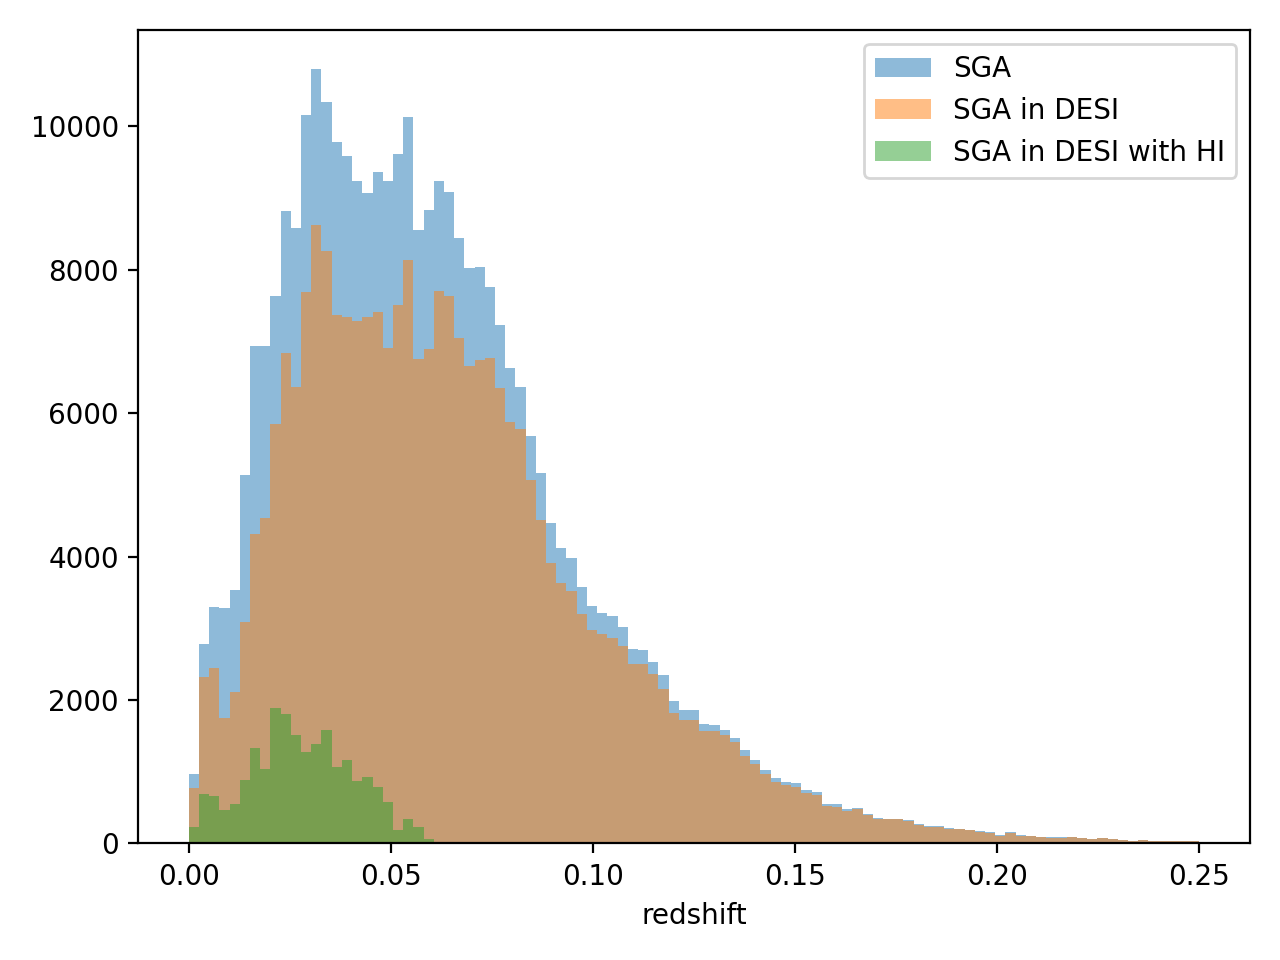

In [9]:
plt.figure()

z_bins = np.linspace(0,0.25,100)

plt.hist(SGA_HI['Z_LEDA'], bins=z_bins, alpha=0.5, label='SGA')
plt.hist(SGA_HI_inDESI['Z_LEDA'], bins=z_bins, alpha=0.5, label='SGA in DESI')
plt.hist(SGA_inDESI_HI['Z_LEDA'], bins=z_bins, alpha=0.5, label='SGA in DESI with HI')

plt.xlabel('redshift')

plt.legend()

plt.tight_layout();

# Diameter distribution

<IPython.core.display.Javascript object>


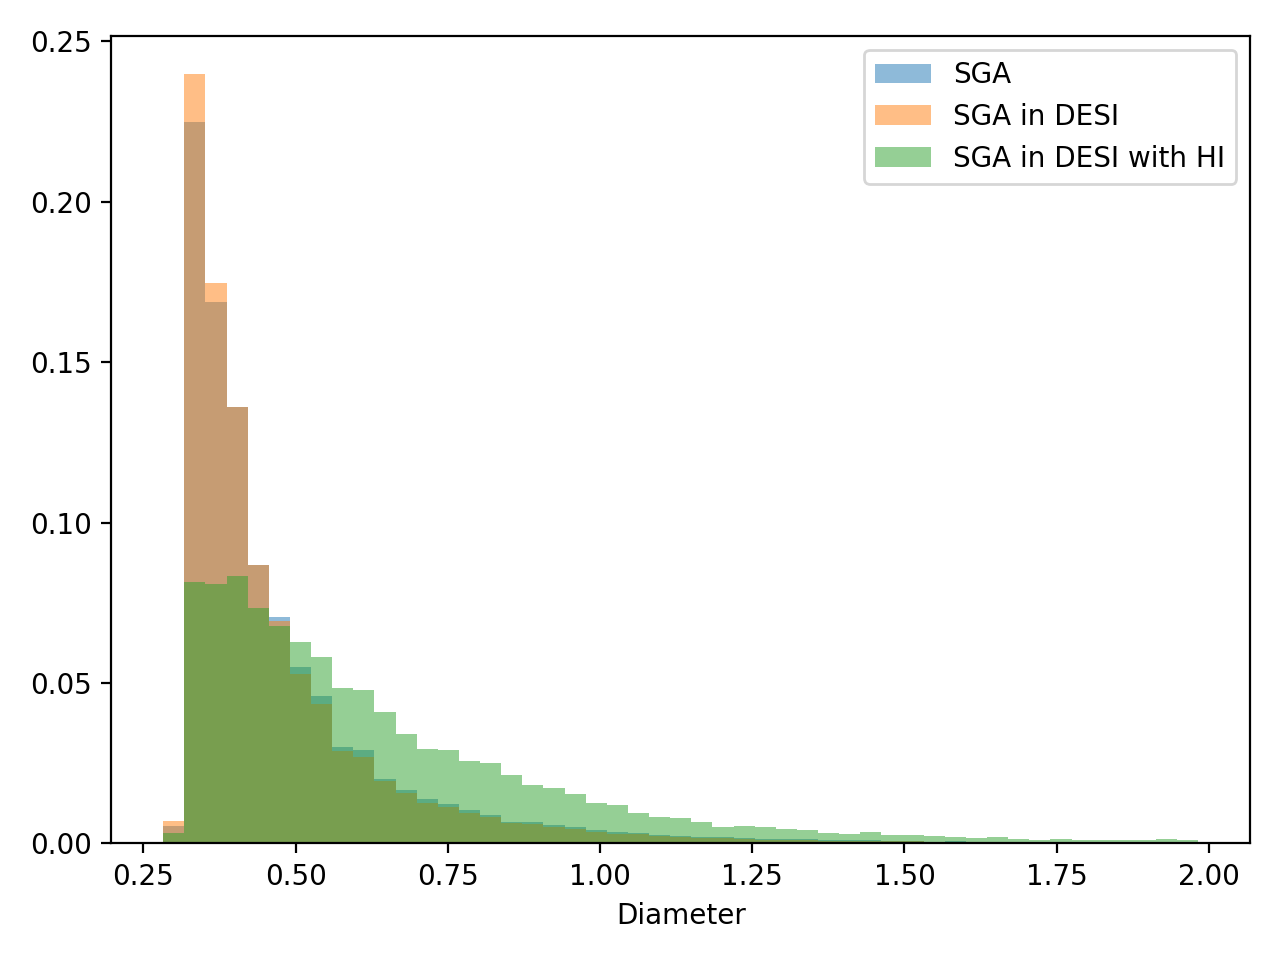

In [11]:
plt.figure()

D25_bins = np.linspace(0.3,2,50)

bin_width = D25_bins[1] - D25_bins[0]

plt.bar(D25_bins[:-1], norm_hist(SGA_HI['D25_LEDA'], D25_bins), width=bin_width, 
        alpha=0.5, label='SGA')
plt.bar(D25_bins[:-1], norm_hist(SGA_HI_inDESI['D25_LEDA'], D25_bins), width=bin_width, 
        alpha=0.5, label='SGA in DESI')
plt.bar(D25_bins[:-1], norm_hist(SGA_inDESI_HI['D25_LEDA'], D25_bins), width=bin_width, 
        alpha=0.5, label='SGA in DESI with HI')

plt.xlabel('Diameter')

plt.legend()

plt.tight_layout();

<IPython.core.display.Javascript object>


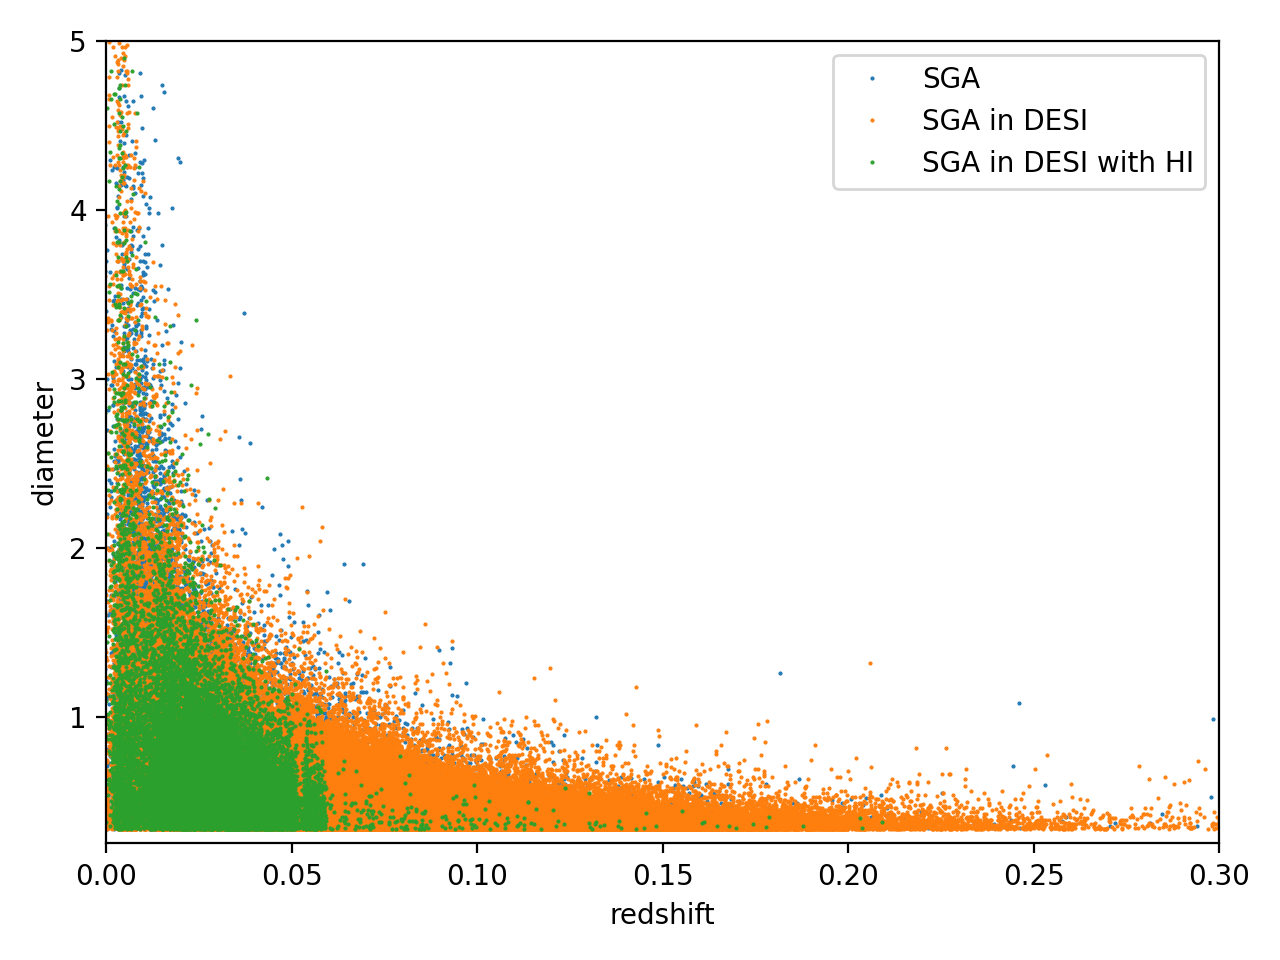

In [12]:
plt.figure()

plt.plot(SGA_HI_noDESI['Z_LEDA'], SGA_HI_noDESI['D25_LEDA'], 
         '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_noHI['Z_LEDA'], SGA_inDESI_noHI['D25_LEDA'], 
         '.', markersize=1, label='SGA in DESI')
plt.plot(SGA_inDESI_HI['Z_LEDA'], SGA_inDESI_HI['D25_LEDA'], 
         '.', markersize=1, label='SGA in DESI with HI')

plt.xlabel('redshift')
plt.ylabel('diameter')

plt.xlim((0,0.3))
plt.ylim((0.25,5))

plt.legend()

plt.tight_layout();

# Axis ratio

<IPython.core.display.Javascript object>


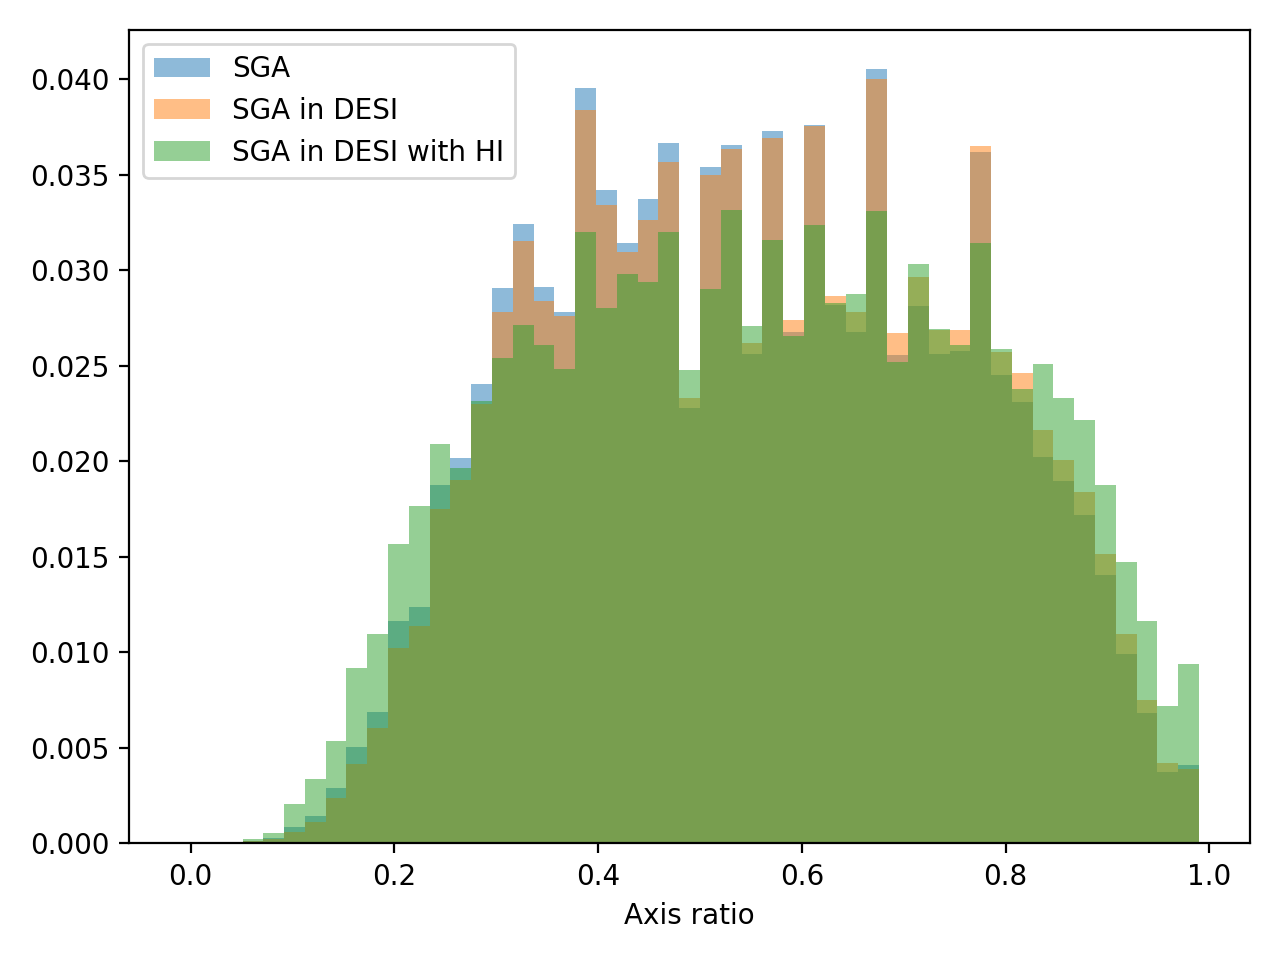

In [13]:
plt.figure()

ba_bins = np.linspace(0,1,50)

bin_width = ba_bins[1] - ba_bins[0]

plt.bar(ba_bins[:-1], norm_hist(SGA_HI['BA'], ba_bins), width=bin_width,
        alpha=0.5, label='SGA')
plt.bar(ba_bins[:-1], norm_hist(SGA_HI_inDESI['BA'], ba_bins), width=bin_width, 
        alpha=0.5, label='SGA in DESI')
plt.bar(ba_bins[:-1], norm_hist(SGA_inDESI_HI['BA'], ba_bins), width=bin_width, 
        alpha=0.5, label='SGA in DESI with HI')

plt.xlabel('Axis ratio')

plt.legend()

plt.tight_layout();

# Magnitude distribution

<IPython.core.display.Javascript object>


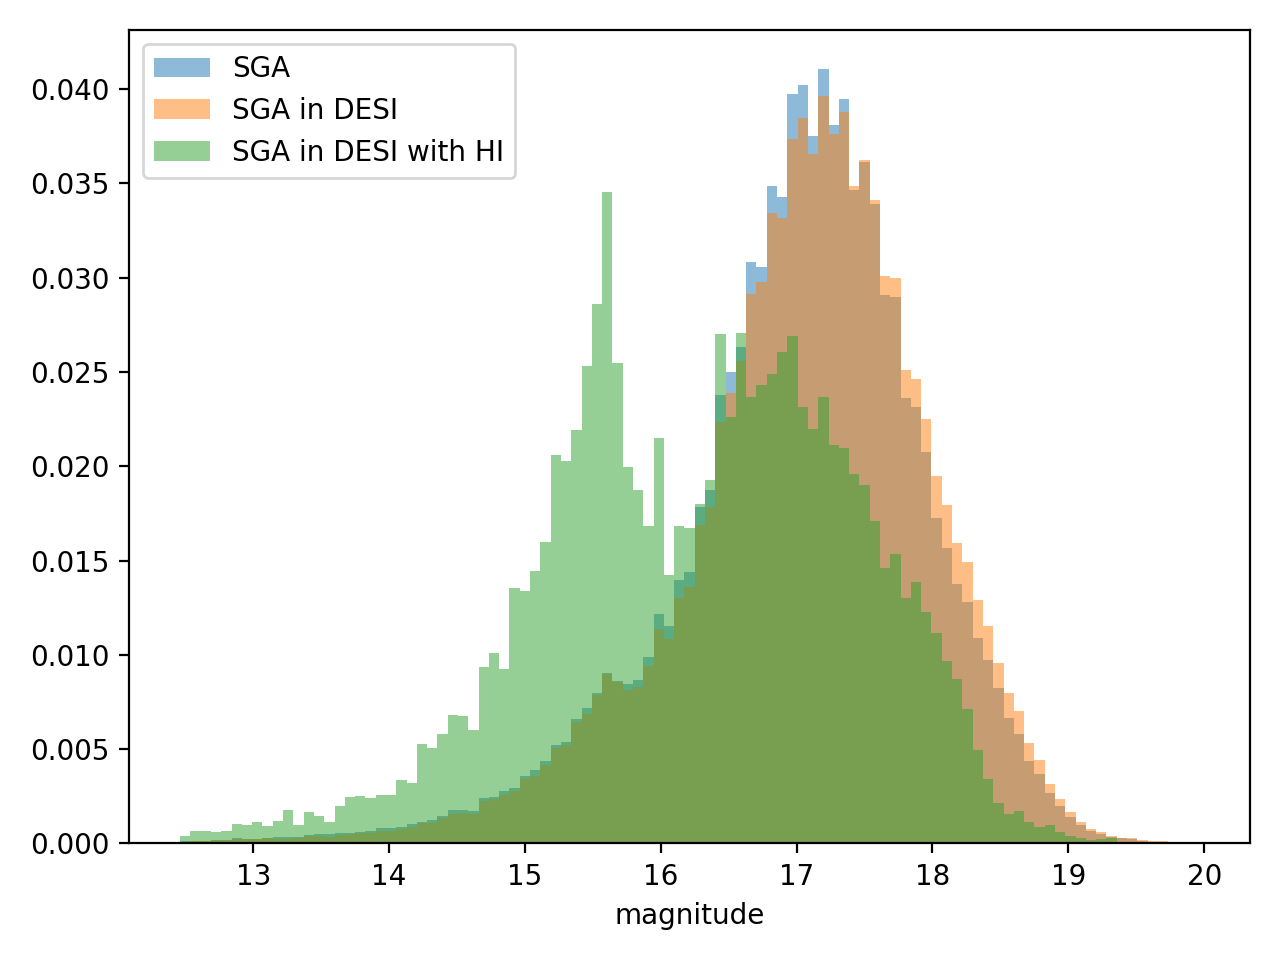

In [16]:
plt.figure()

m_bins = np.linspace(12.5,20,100)

bin_width = m_bins[1] - m_bins[0]

plt.bar(m_bins[:-1], norm_hist(SGA_HI['MAG_LEDA'], m_bins), width=bin_width, 
        alpha=0.5, label='SGA')
plt.bar(m_bins[:-1], norm_hist(SGA_HI_inDESI['MAG_LEDA'], m_bins), width=bin_width, 
        alpha=0.5, label='SGA in DESI')
plt.bar(m_bins[:-1], norm_hist(SGA_inDESI_HI['MAG_LEDA'], m_bins), width=bin_width, 
        alpha=0.5, label='SGA in DESI with HI')

plt.xlabel('magnitude')

plt.legend()

plt.tight_layout();

<IPython.core.display.Javascript object>


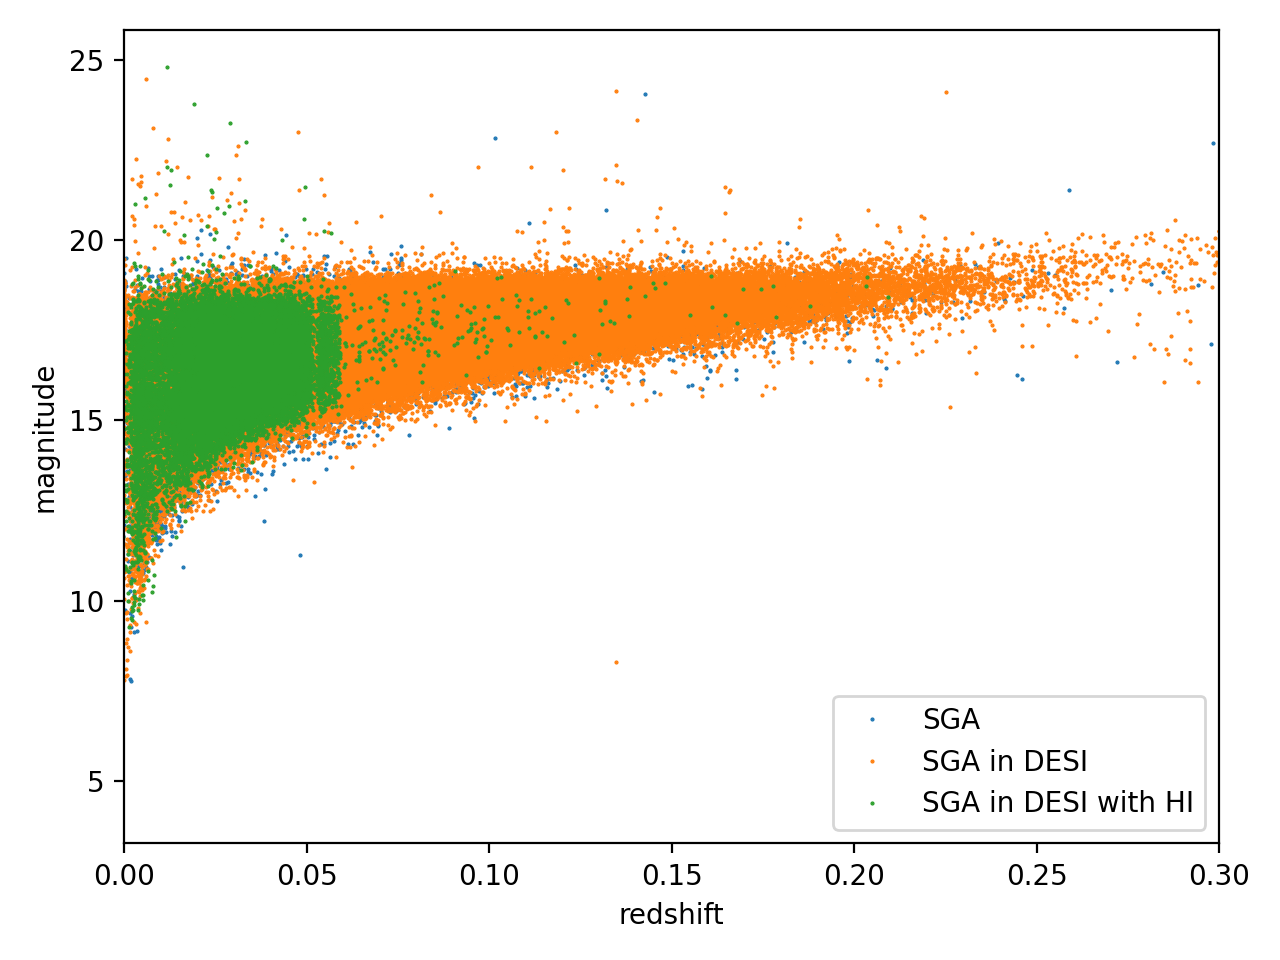

In [17]:
plt.figure()

plt.plot(SGA_HI_noDESI['Z_LEDA'], SGA_HI_noDESI['MAG_LEDA'], 
         '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_noHI['Z_LEDA'], SGA_inDESI_noHI['MAG_LEDA'], 
         '.', markersize=1, label='SGA in DESI')
plt.plot(SGA_inDESI_HI['Z_LEDA'], SGA_inDESI_HI['MAG_LEDA'], 
         '.', markersize=1, label='SGA in DESI with HI')

plt.xlabel('redshift')
plt.ylabel('magnitude')

plt.xlim((0,0.3))

plt.legend()

plt.tight_layout();